#Import

In [1]:
!pip install import-ipynb
loaded = False
import import_ipynb
import numpy as np
import gc
from sklearn.model_selection import KFold
from tqdm import tqdm
import os,logging,pickle,random,torch
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import keras
import h5py
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Activation, LSTM, GRU, SimpleRNN, Conv1D, TimeDistributed, MaxPooling1D, Flatten, Dropout, Input, AveragePooling1D, Add, Concatenate
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from google.colab import drive

datadir = 'Dataset/embedded_data'
drive.mount('/content/drive', force_remount=True)

%cd "drive/MyDrive/Bionformatics_Project/Colab"

from Classes.BioLSTM import BioLSTM
from Classes.DataManager import DataManager

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=8d6a7e7d62639f3a888b588d6945131274fb38c68ec04993d39cc3d3c3f906bf
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab
importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/BioLSTM.ipynb
importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/DataManager.ipynb


#Sequences, Halflife data and Transcription Factors

In [ ]:
print("> Loading DataManager...")
dm = DataManager(DeepLncLoc = True, tf = True)

print("> Loading train data...")
X_train_h, X_train, y_train, X_train_tf = dm.get_train()

print("> Loading validation data...")
X_val_h, X_validation, y_validation, X_val_tf = dm.get_validation()

print("> Loading test data...")
X_test_h, X_test, y_test, X_test_tf = dm.get_test()

print("\n**************\n     DONE\n**************\n")

> Loading DataManager...
> Loading train data...
> Loading validation data...
> Loading test data...

**************
     DONE
**************



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
promoter (InputLayer)           [(None, 210, 64)]    0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 210, 64)      256         promoter[0][0]                   
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 100)          66000       batch_normalization_1[0][0]      
__________________________________________________________________________________________________
halflife (InputLayer)           [(None, 8)]          0                                            
____________________________________________________________________________________________

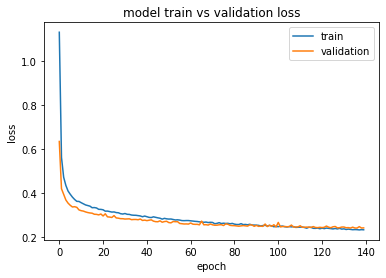

In [ ]:
m = BioLSTM(model_type='tf',n_epochs=140, opt='adam', lr=0.00005)
m.train_model(x=[X_trainpromoter,X_trainhalflife, X_train_tf],y=y_train,x_v=[X_validation,X_val_h,X_val_tf],y_v=y_validation)

In [ ]:
print('-'*30)
print('>>Result for last epoch')
f_r2 = m.evaluate([X_test,X_test_h,X_test_tf],y_test)
print('-'*30)
print('>>Result for best model')
b_r2 = m.evaluate_best([X_test,X_test_h,X_test_tf],y_test)
print('-'*30)

------------------------------
>>Result for last epoch
Test R^2 = 0.758
------------------------------
>>Result for best model
Test R^2 = 0.759
------------------------------


No handles with labels found to put in legend.


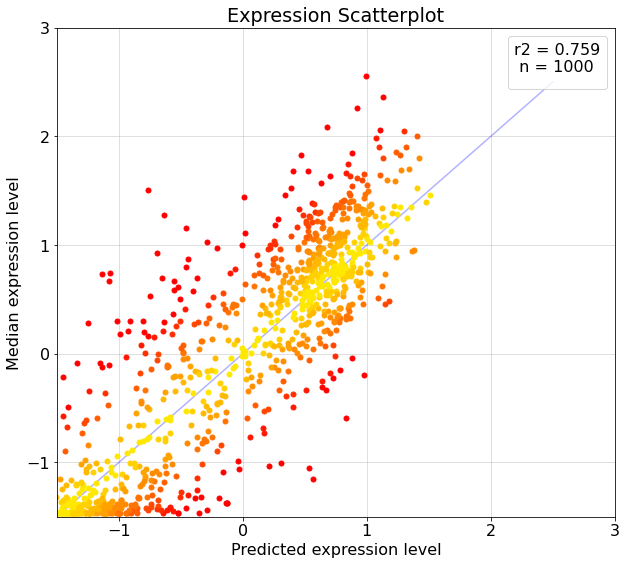

In [ ]:
m.plot_r2([X_test,X_test_h, X_test_tf], y_test)

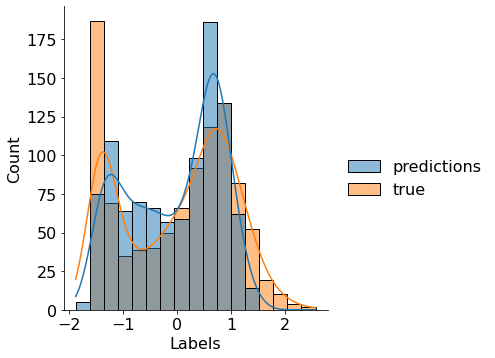

In [ ]:
m.plot_kde([X_test,X_test_h, X_test_tf], y_test)

#Sequences and Halflife data

In [2]:
print("> Loading DataManager...")
dm = DataManager(DeepLncLoc = True)

print("> Loading train data...")
X_train_h, X_train, y_train, _  = dm.get_train()

print("> Loading validation data...")
X_val_h, X_validation, y_validation, _ = dm.get_validation()

print("> Loading test data...")
X_test_h, X_test, y_test, _ = dm.get_test()

print("\n**************\n     DONE\n**************\n")

> Loading DataManager...
> Loading train data...
> Loading validation data...
> Loading test data...

**************
     DONE
**************



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
promoter (InputLayer)           [(None, 210, 64)]    0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 210, 64)      256         promoter[0][0]                   
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 100)          66000       batch_normalization[0][0]        
__________________________________________________________________________________________________
halflife (InputLayer)           [(None, 8)]          0                                            
______________________________________________________________________________________________

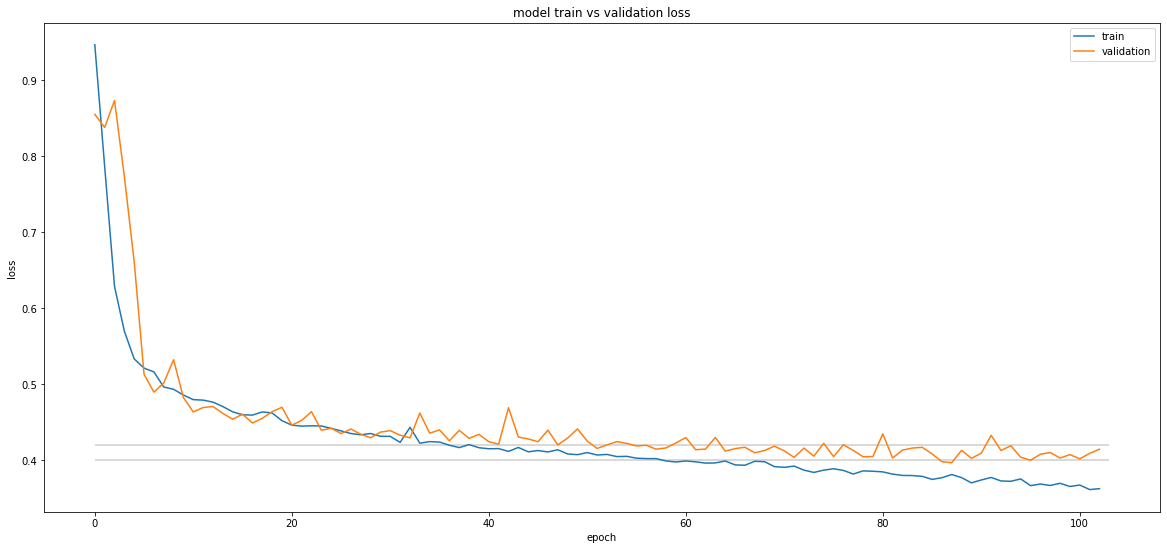

In [3]:
m = BioLSTM(model_type='classic', opt='adam', lr=0.0003, n_epochs=160)
m.train_model(x=[X_train,X_train_h],y=y_train,x_v=[X_validation,X_val_h],y_v=y_validation)

In [4]:
print('-'*30)
print('>>Result for last epoch')
f_r2 = m.evaluate([X_test,X_test_h],y_test)
print('-'*30)
print('>>Result for best model')
b_r2 = m.evaluate_best([X_test,X_test_h],y_test)
print('-'*30)

------------------------------
>>Result for last epoch
Test R^2 = 0.606
------------------------------
>>Result for best model
Test R^2 = 0.598
------------------------------


No handles with labels found to put in legend.


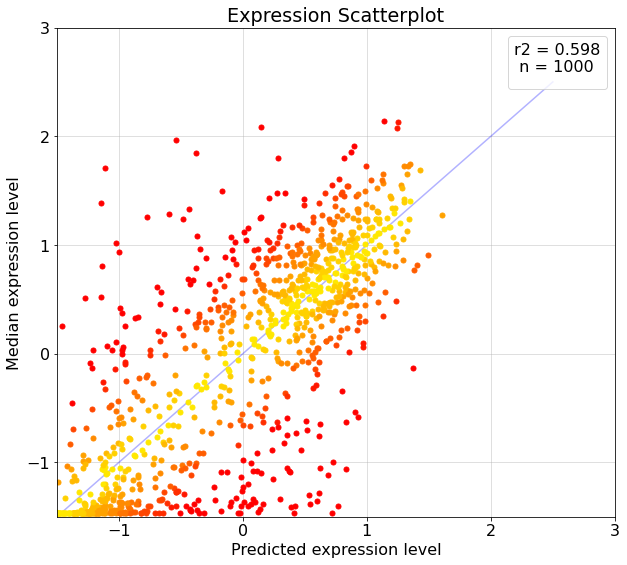

In [6]:
m.plot_r2([X_test,X_test_h], y_test)

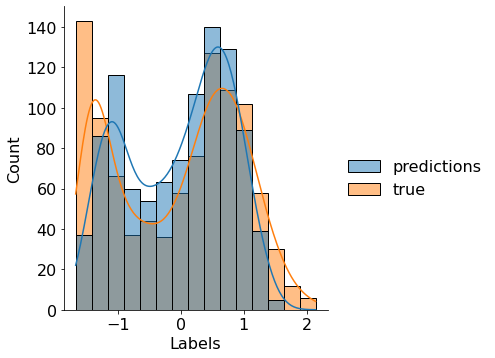

In [7]:
m.plot_kde([X_test,X_test_h], y_test)

#Only Sequences

In [8]:
print("> Loading DataManager...")
dm = DataManager(DeepLncLoc = True)

print("> Loading train data...")
_, X_train, y_train, _  = dm.get_train()

print("> Loading validation data...")
_, X_validation, y_validation, _ = dm.get_validation()

print("> Loading test data...")
_, X_test, y_test, _ = dm.get_test()

print("\n**************\n     DONE\n**************\n")

> Loading DataManager...
> Loading train data...
> Loading validation data...
> Loading test data...

**************
     DONE
**************



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
promoter (InputLayer)        [(None, 210, 64)]         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 210, 64)           256       
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dense_2 (Dense)              (None, 90)                9090      
_________________________________________________________________
dropout_1 (Dropout)          (None, 90)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 91        
Total params: 75,437
Trainable params: 75,309
Non-trainable params: 128
_____________________________________________________

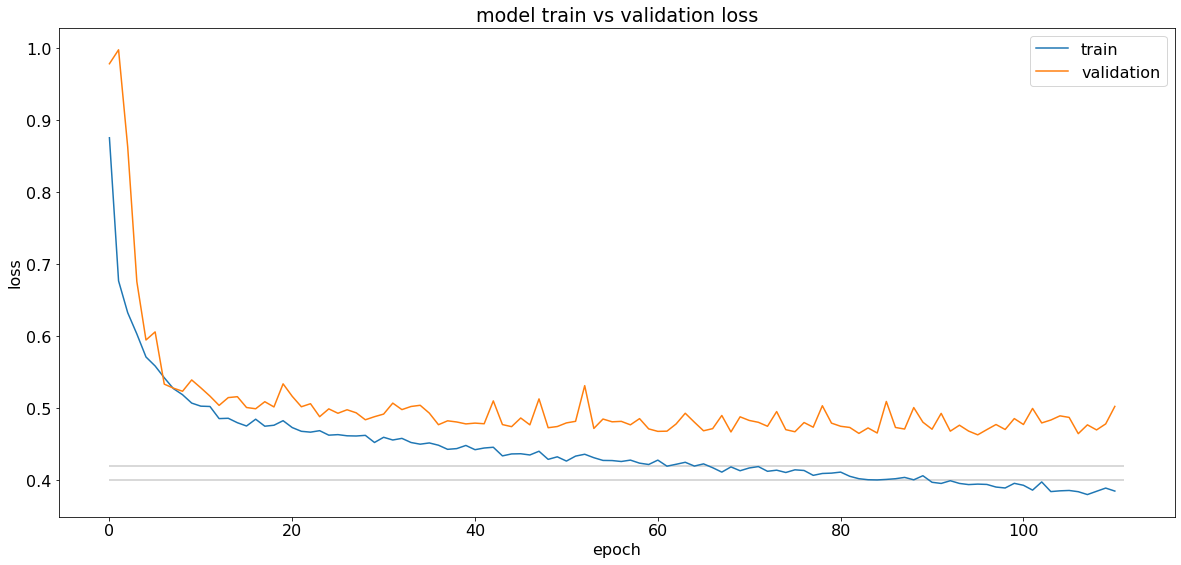

In [9]:
m = BioLSTM(model_type='only promoter', opt='adam', lr=0.0003, n_epochs=140)
m.train_model(x=X_train,y=y_train,x_v=X_validation,y_v=y_validation)

In [10]:
print('-'*30)
print('>>Result for last epoch')
f_r2 = m.evaluate(X_test,y_test)
print('-'*30)
print('>>Result for best model')
b_r2 = m.evaluate_best(X_test,y_test)
print('-'*30)

------------------------------
>>Result for last epoch
Test R^2 = 0.565
------------------------------
>>Result for best model
Test R^2 = 0.574
------------------------------


No handles with labels found to put in legend.


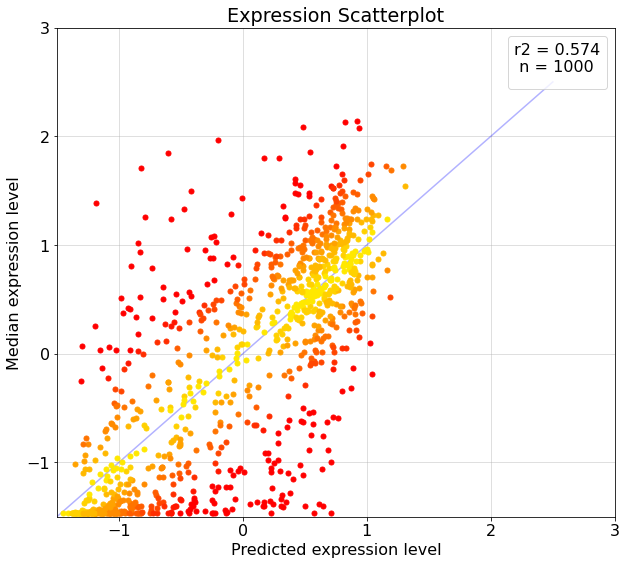

In [11]:
m.plot_r2([X_test], y_test)

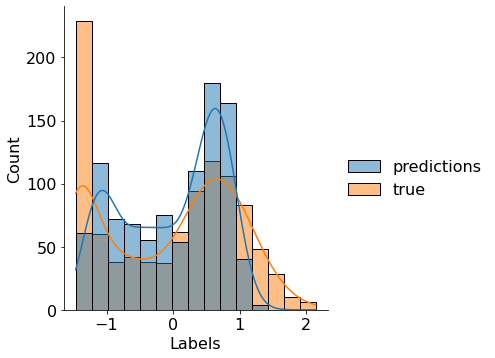

In [12]:
m.plot_kde([X_test], y_test)